In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/output.csv')
data

,Unnamed: 0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,201,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

# Assuming your DataFrame has an extra index column 'Unnamed: 0'
# Add a placeholder for the index column to the headers list
headers.insert(0, "Unnamed: 0")  # or any name you prefer for the index column

# Now assign the updated headers
data.columns = headers

data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
# Now assign the updated headers
data.columns = headers


data.price.unique()

# Here it contains '?', so we Drop it
data = data[data.price != '?']

# Convert 'price' to numeric, handling errors by coercing to NaN
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Drop rows with NaN values in the 'price' column
data = data.dropna(subset=['price'])

# Now convert 'price' to integers, after ensuring there are no NaNs or non-finite values
data['price'] = data['price'].astype(int)

# checking it again
data.dtypes

,0
Unnamed: 0,int64
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object


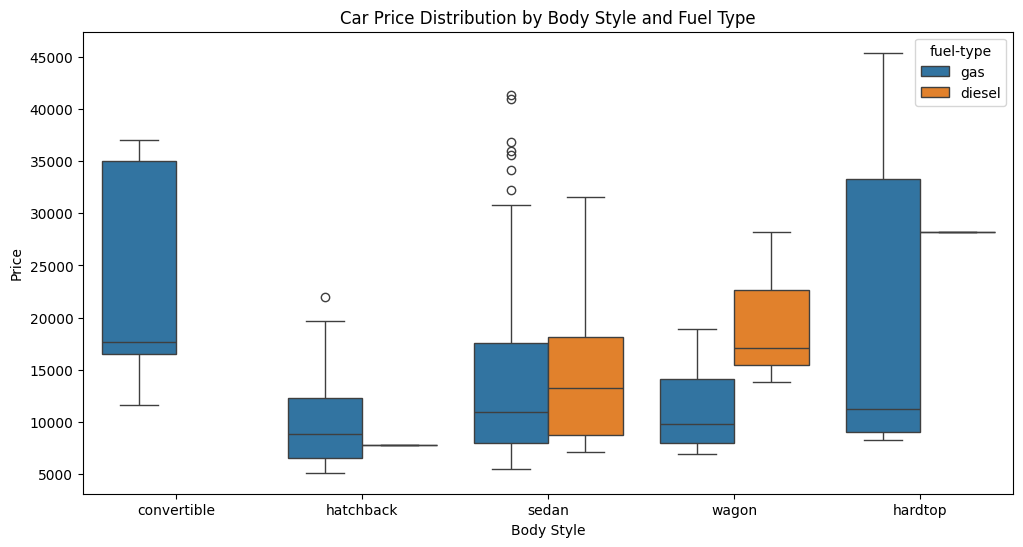

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data (if not already loaded)
#data = pd.read_csv('/mnt/data/output.csv')

# Convert columns with `?` to NaN and make numeric conversions where applicable
data.replace("?", pd.NA, inplace=True)
data["price"] = pd.to_numeric(data["price"], errors='coerce')
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
data["city-mpg"] = pd.to_numeric(data["city-mpg"], errors='coerce')
data["highway-mpg"] = pd.to_numeric(data["highway-mpg"], errors='coerce')

# 1. Car Price Analysis by Body Style and Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="body-style", y="price", hue="fuel-type")
plt.title("Car Price Distribution by Body Style and Fuel Type")
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.show()



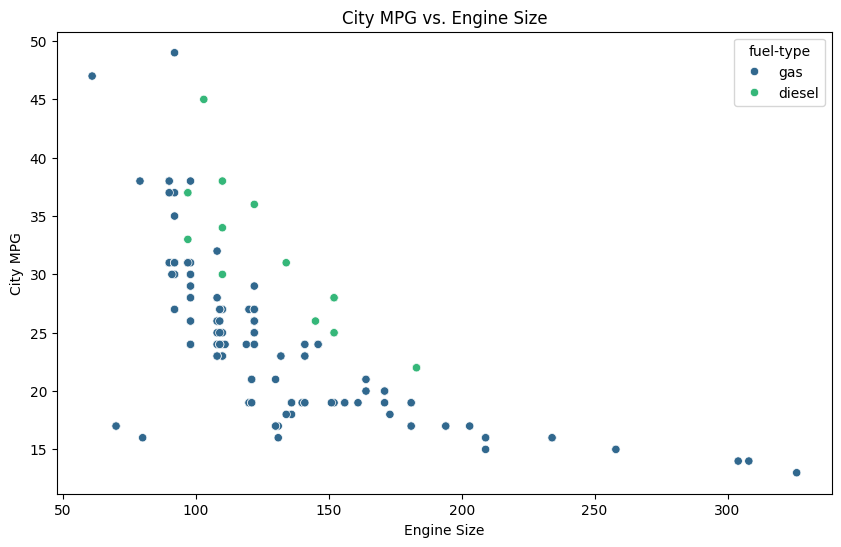

In [ ]:
# 2. Fuel Efficiency Analysis by Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="engine-size", y="city-mpg", hue="fuel-type", palette="viridis")
plt.title("City MPG vs. Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("City MPG")
plt.show()



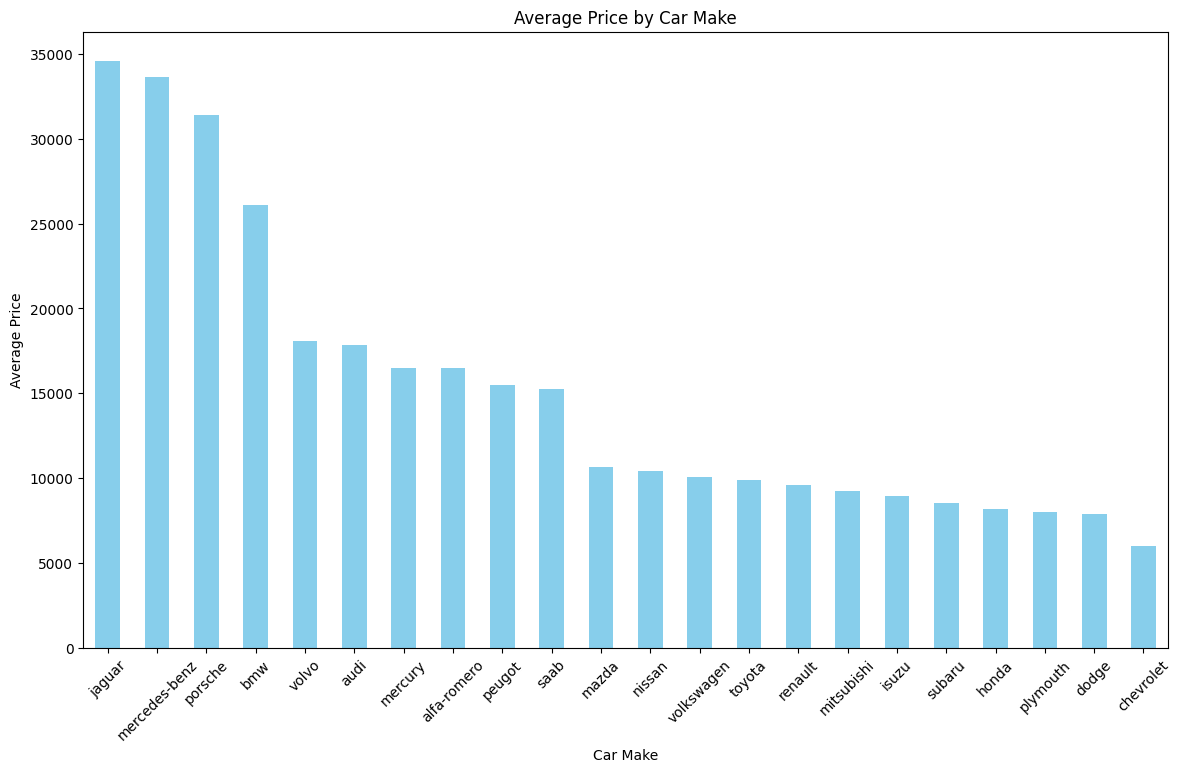

In [ ]:
# 3. Average Price per Car Make
avg_price_by_make = data.groupby("make")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
avg_price_by_make.plot(kind='bar', color='skyblue')
plt.title("Average Price by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


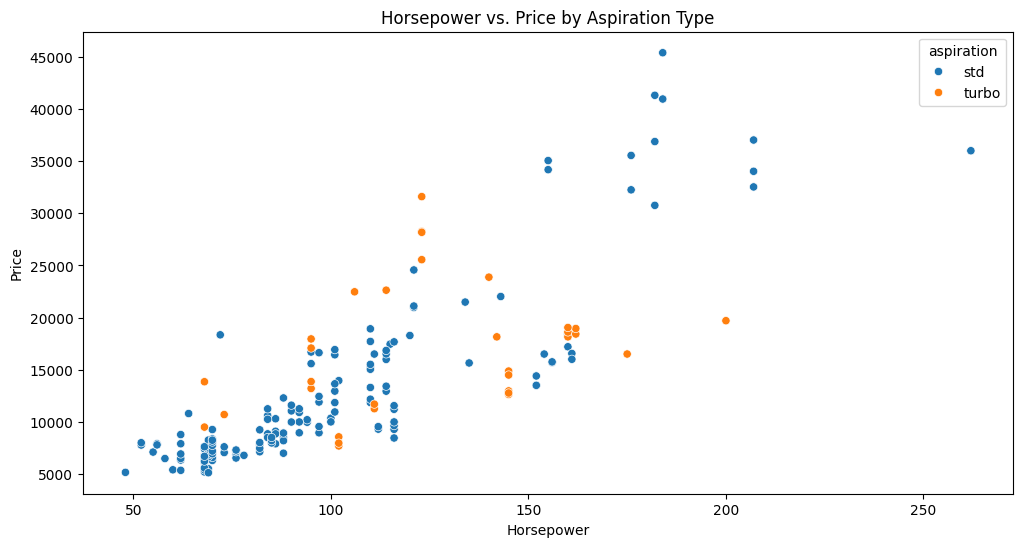

In [ ]:

# 4. Horsepower and Peak RPM Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="horsepower", y="price", hue="aspiration")
plt.title("Horsepower vs. Price by Aspiration Type")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()




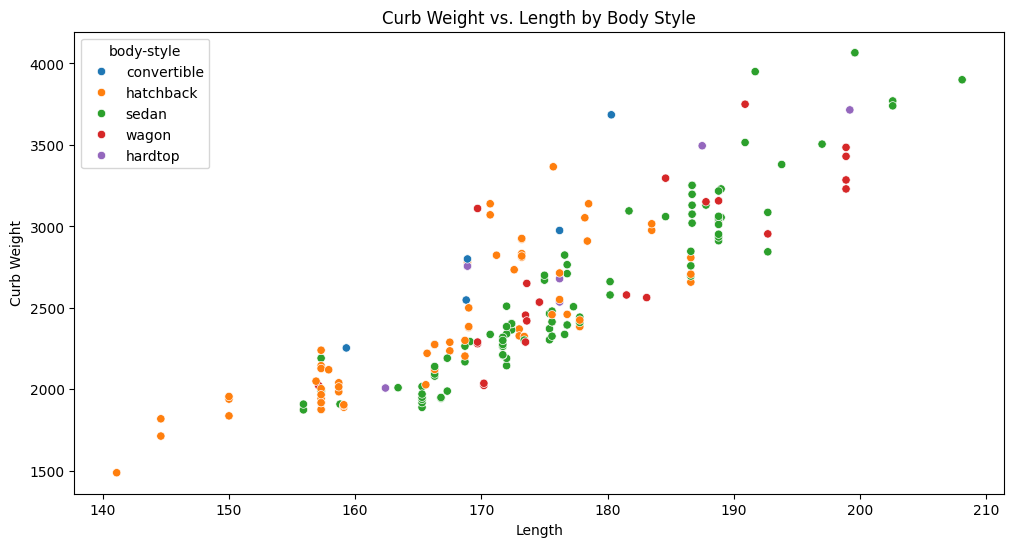

In [ ]:
# 5. Relationship between Car Dimensions and Curb Weight
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="length", y="curb-weight", hue="body-style")
plt.title("Curb Weight vs. Length by Body Style")
plt.xlabel("Length")
plt.ylabel("Curb Weight")
plt.show()



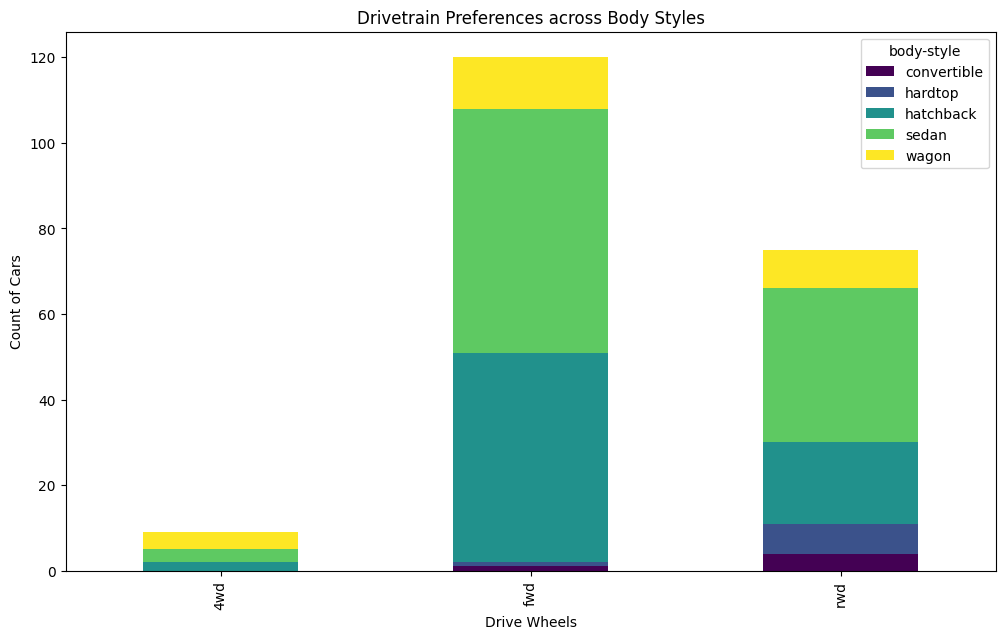

In [ ]:
# 6. Drivetrain Preferences across Body Styles
drivetrain_body_style = data.groupby(["drive-wheels", "body-style"]).size().unstack().fillna(0)
drivetrain_body_style.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="viridis")
plt.title("Drivetrain Preferences across Body Styles")
plt.xlabel("Drive Wheels")
plt.ylabel("Count of Cars")
plt.show()



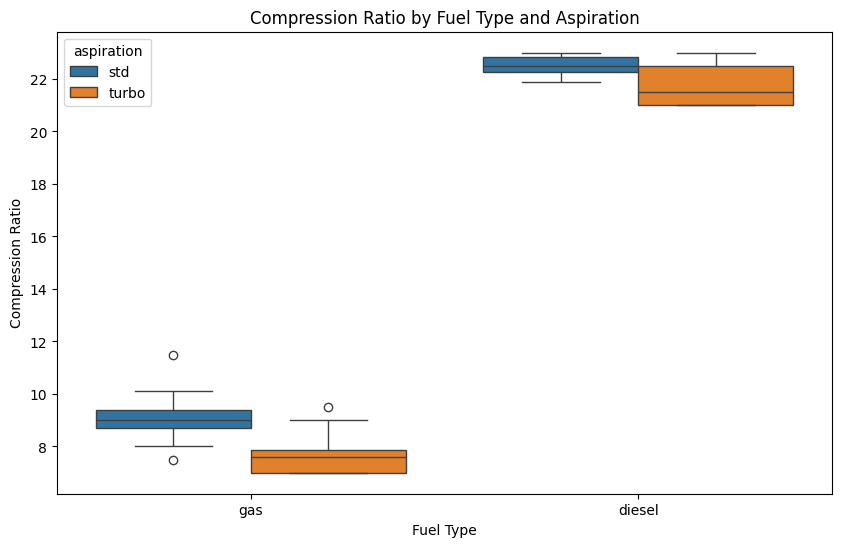

In [ ]:
# 7. Compression Ratio by Fuel Type and Aspiration
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="fuel-type", y="compression-ratio", hue="aspiration")
plt.title("Compression Ratio by Fuel Type and Aspiration")
plt.xlabel("Fuel Type")
plt.ylabel("Compression Ratio")
plt.show()


<ipython-input-18-3b1d62394bf8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="engine-location", y="curb-weight", palette="coolwarm")


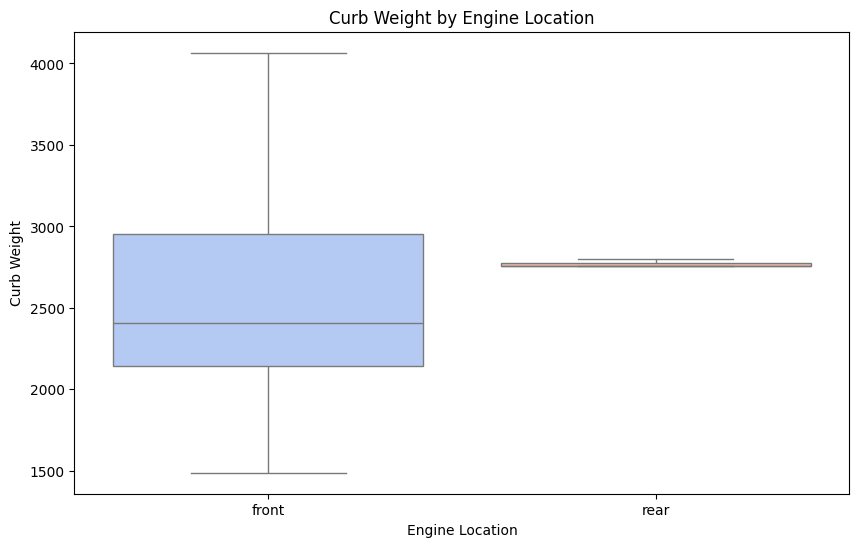

In [ ]:

# 8. Engine Location Impact on Car Specifications
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="engine-location", y="curb-weight", palette="coolwarm")
plt.title("Curb Weight by Engine Location")
plt.xlabel("Engine Location")
plt.ylabel("Curb Weight")
plt.show()

In [ ]:
data

,Unnamed: 0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,201,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
# Convert 'price' column to numeric, handling errors
test['price'] = pd.to_numeric(test['price'], errors='coerce')

# Grouping Data with the updated 'price' column
data_grp = test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

data_grp


<ipython-input-34-8e8f10a50c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price'] = pd.to_numeric(test['price'], errors='coerce')


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


<ipython-input-35-fe59bee3bf78>:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


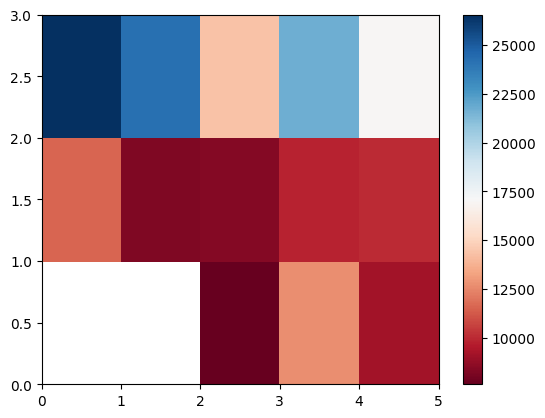

In [ ]:
# pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
                            columns = 'body-style')
data_pivot

# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

<ipython-input-44-7abfcd957bb9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_annova['price'] = pd.to_numeric(data_annova['price'], errors='coerce')
<ipython-input-44-7abfcd957bb9>:13: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  annova_results_l = sp.stats.f_oneway(
<ipython-input-44-7abfcd957bb9>:14: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('honda')['price'],
<ipython-input-44-7abfcd957bb9>:15: FutureWarning: When grouping with a length-1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53527.92483368015)

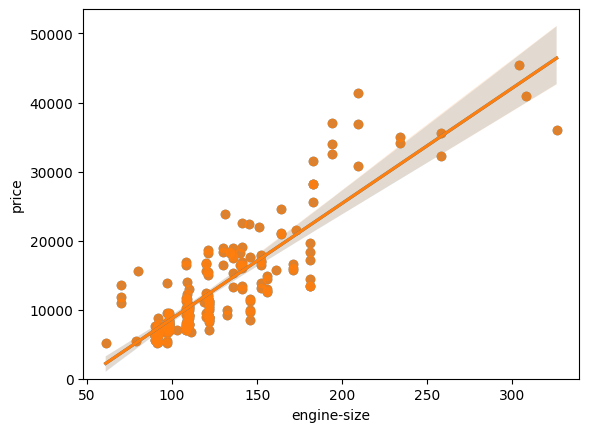

In [ ]:
import scipy.stats as sp
import pandas as pd

# ... (your previous code)

# Analysis of Variance- ANOVA
data_annova = data[['make', 'price']]

# Convert 'price' column to numeric, handling errors
data_annova['price'] = pd.to_numeric(data_annova['price'], errors='coerce')

grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)

# ... (rest of your code)
import scipy.stats as sp # Import the scipy.stats module with the alias 'sp'

# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by
# variation within sample group
# p-value = confidence degree

print(annova_results_l)

# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
# Assuming 'sns' refers to seaborn, ensure it's imported
import seaborn as sns  # Import seaborn if not already imported
# Correlation- measures dependency, not causation
sns.regplot(x='engine-size', y='price', data=data)
plt.ylim(0, )
# Convert 'engine-size' and 'price' columns to numeric, handling errors
data['engine-size'] = pd.to_numeric(data['engine-size'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# ... (rest of your code)

# Correlation- measures dependency, not causation
sns.regplot(x='engine-size', y='price', data=data)
plt.ylim(0, )